# Cook County Housing Analysis

This project focuses on analyzing housing data from Cook County, Illinois, to explore factors that influence housing prices and prepare the data for predictive modeling. The analysis involves a comprehensive workflow that includes data wrangling, exploratory data analysis (EDA), feature engineering, and visualization.

### Project Overview

The Cook County dataset consists of over 500,000 records with 62 features related to housing properties, including property attributes, neighborhood characteristics, and sales information. The objective is to derive insights from the data, engineer features for predictive modeling, and conduct EDA to gain a better understanding of the dataset.

#### Main Objectives:
- **Data Cleaning and Contextualizing:** Clean and ask questions about the dataset for subsequent analysis.
- **Exploratory Data Analysis (EDA):** Visualize relationships between key features, such as housing attributes and sales prices, to understand trends and correlations.
- **Feature Engineering:** Prepare features like log-transformed sales prices and housing area for use in a predictive model for housing price prediction.

### The Dataset:

   - Loaded housing data from Cook County, extracted from a compressed archive.
   - Verified data shape (204,792 observations and 62 features) and explored columns to understand the data's granularity and structure.
   - Developed questions about factors influencing housing prices and the potential impact of different features on property valuation.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import zipfile
import os
from sklearn.preprocessing import OneHotEncoder

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [2]:
# Loading Dataset
with zipfile.ZipFile('cook_county_data.zip') as item:
    item.extractall()

Let's load the training data.

In [3]:
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

Let's take a quick look at the first few rows of our training data.

In [4]:
training_data.head(3)

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size
0,17294100610000,203,50,2500.0,76,0.0,2.0,1.0,1.0,3.0,...,9,2,1.0,13.2,0,0.0,50,7650,"This property, sold on 09/14/2015, is a one-st...",2500.0
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,5,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,2,1,0.0,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0


Understanding what 'Description' column is.

In [8]:
training_data['Description'].iloc[0]

'This property, sold on 09/14/2015, is a one-story houeshold located at 2950 S LYMAN ST.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

### Key Steps and Analysis

### **Part 1: Contextualizing the Data**

#### Questions:
**Question 1a:** Based on the columns in this dataset and the values that they take, what do you think each row represents? What is the granularity of this dataset?

Each row represents the overall description of a specific property when listed sold. The row will provide specific details relating to the particular property. Granularity: sold property!

**Question 1b:** Why do you think this data was collected? For what purposes? By whom?


This dataset could provide many useful insights to determine the values/price of a particular property in Cook County. Exploring the location of some properties and their property values could tell buyers a lot about their expectation of certain area conditions and if a particular housing fits their preferance. This dataset could've been collected by the county, or a tech real-estate company or agents who may want to know or better the house pricing in the market.

**Question 1c:** Identify at least one demographic-related variable and explain the nature of the demographic data it embeds.

'Neighborhood code', 'neighborhood code (mapping)' and 'Town and Neighborhood' are variables in this dataset that could be used to explore certain demographic information in a particular area or town. These variables could help analysts distinguish how certain demographic is like compare to others in terms of the areas social expectations.

**Question 1d:** Craft at least one question about housing in Cook County that can be answered with this dataset and provide the type of analytical tool you would use to answer it.

Is there a correlation between property values and proximity to O'Hare airport? 

To investigate, I plan to create a graph that charts 'O'Hare Noise' against the combined values of 'Estimate(Land)' and 'Estimate(Building)'. Also, since winters in Chicago are typically cold, I am curious to know if more houses are sold during the summer months. To explore this I intend to plot the 'Sale Month of Year' against both the count of properties sold and the total value of properties sold in each month.

### **Part 2: Exploratory Data Analysis (EDA)**

First I want to explore the distribution of the target variable “Sale Price.”

I'm defining a helper function "plot_distribution" to visualize the distribution of the target variable using histogram.

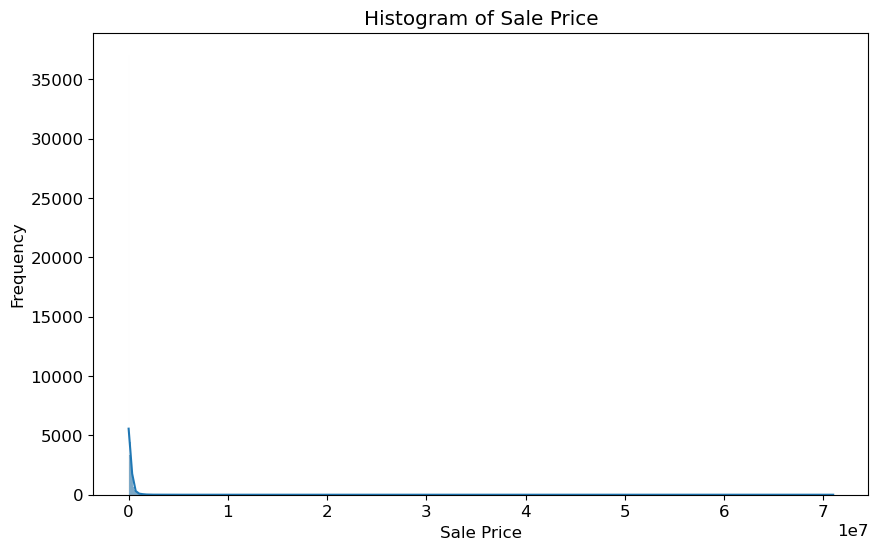

In [9]:
def plot_histogram(data, label):
    plt.figure(figsize=(10, 6))

    sns.histplot(
        data[label],
        kde=True,  # Include Kernel Density Estimate for better visualization of distribution
    )
    
    plt.title('Histogram of ' + label)
    plt.xlabel(label)
    plt.ylabel('Frequency')

    plt.show()

# Plot the histogram for "Sale Price"
plot_histogram(training_data, label='Sale Price')

It seems like all the data is bunched up at x_input (sale price) between 0-0.3 without unit indication, so generally it is difficult to interpret this graph. The problem might be within the dataset column "Sale Price" itself, where there are potentially outlier values as you can see at 7.1e7 could cause the graph to compress. 

To address the skewness in the data, I need to apply log transformation to the sales price. 

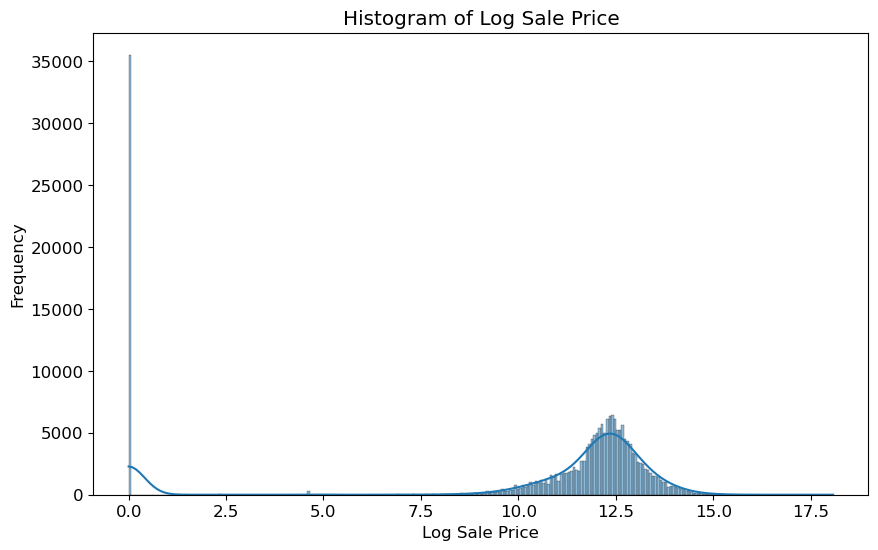

In [10]:
training_data['Log Sale Price'] = np.log(training_data['Sale Price'])
plot_histogram(training_data, label='Log Sale Price')

We're going to set a minimum threshold for the "Sale Price" to be at least $500 to exclude extremely low or erroneous values that can negatively affect the distribution of the target variable.

In [11]:
training_data = training_data[training_data['Sale Price'] >= 500]

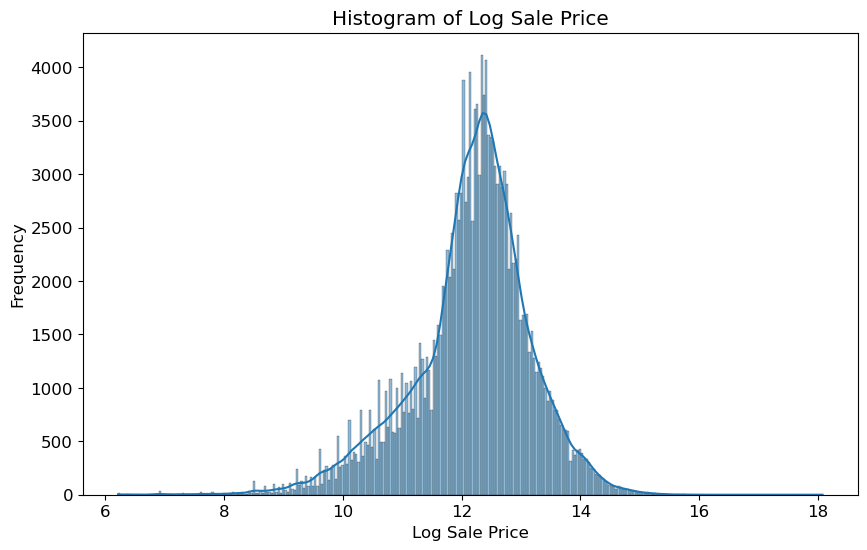

In [12]:
plot_histogram(training_data, label='Log Sale Price');

Let's examine relationships between “Log Sale Price” and other variables like “Building Square Feet” or "neighborhood codes". 

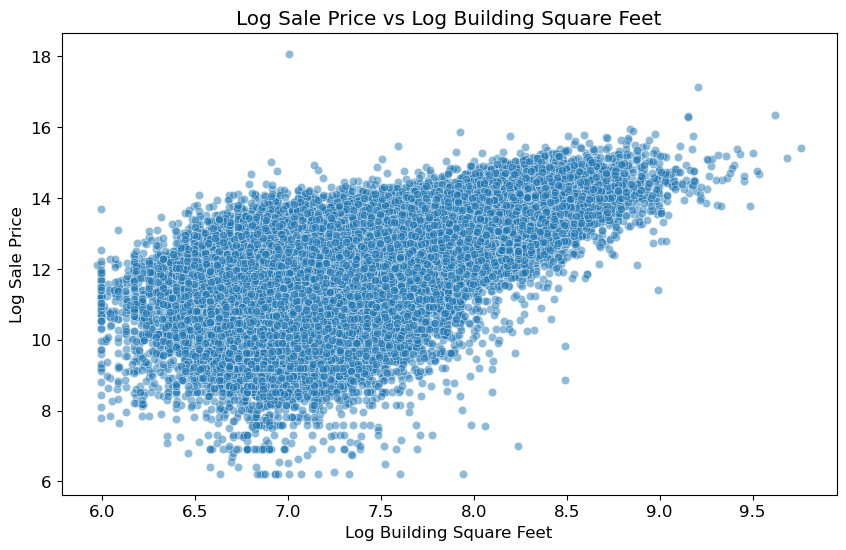

In [13]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=training_data, x='Log Building Square Feet', y='Log Sale Price', alpha=0.5)
plt.title('Log Sale Price vs Log Building Square Feet')
plt.xlabel('Log Building Square Feet')
plt.ylabel('Log Sale Price')
plt.show()

<Figure size 1000x800 with 0 Axes>

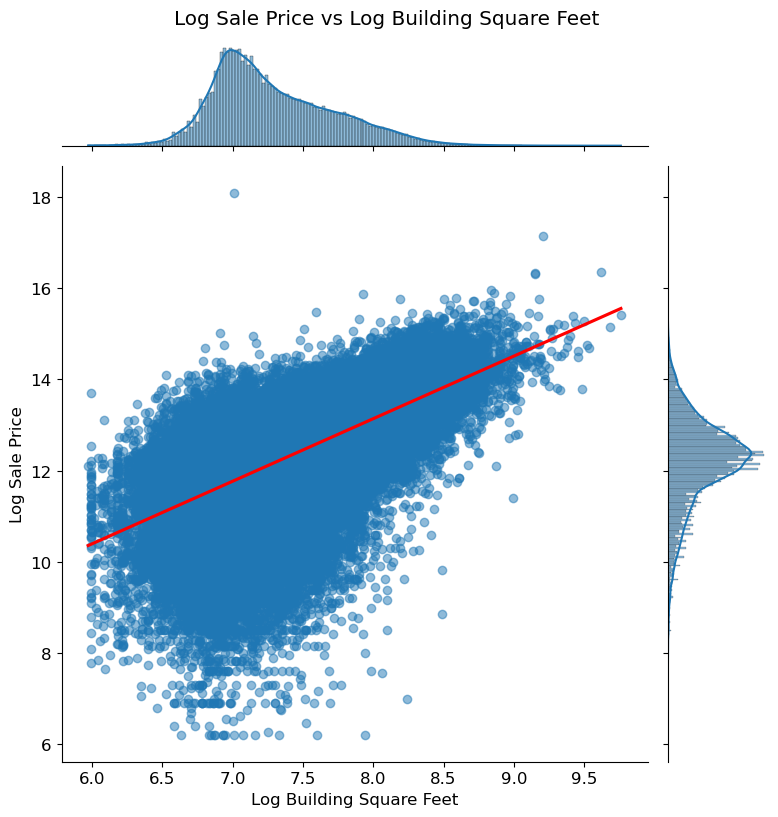

In [14]:
plt.figure(figsize=(10, 8))
sns.jointplot(
    data=training_data,
    x='Log Building Square Feet',
    y='Log Sale Price',
    kind='reg',  # Adds a regression line
    height=8,    # Controls the size of the plot
    scatter_kws={'alpha': 0.5},  # Adjust transparency of scatter points
    line_kws={'color': 'red'}  # Makes regression line red for better visibility
)

plt.suptitle('Log Sale Price vs Log Building Square Feet', y=1.02)
plt.show()

The plot shows that both log sale price and log buidling square feet would be a good candidate as of the features for model because there the variable seems to have a positive correlation, also shown by the moderately steep and positve slope of the fitted linear regression line. However, the two data also have some spurious outliers. The density of the data/values reveal that this might not be the most evenly distributed dataset (tails), but it's appropriate enough to explore.

### **Part 3: Feature Engineering**

Let's start simple by extracting the total number of bedrooms as our first feature for the model. You may notice that the "Bedrooms" column doesn't actually exist in the original dataframe! Instead, it is part of the "Description" column.

In [15]:
def add_total_bedrooms(data):
    """
    Input:
      data (DataFrame): a DataFrame containing at least the Description column.
    """
    with_rooms = data.copy()
    with_rooms['Bedrooms'] = with_rooms['Description'].str.extract(r',\s(\d+)\s+').astype(int).fillna(0)
    return with_rooms

training_data = add_total_bedrooms(training_data)
training_data.head(3)

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,3
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,3


Now let's visualize to see if there exists an association between  Bedrooms and Log Sale Price. 

Text(0.5, 1.0, 'Bedrooms vs Sale Price (Log)')

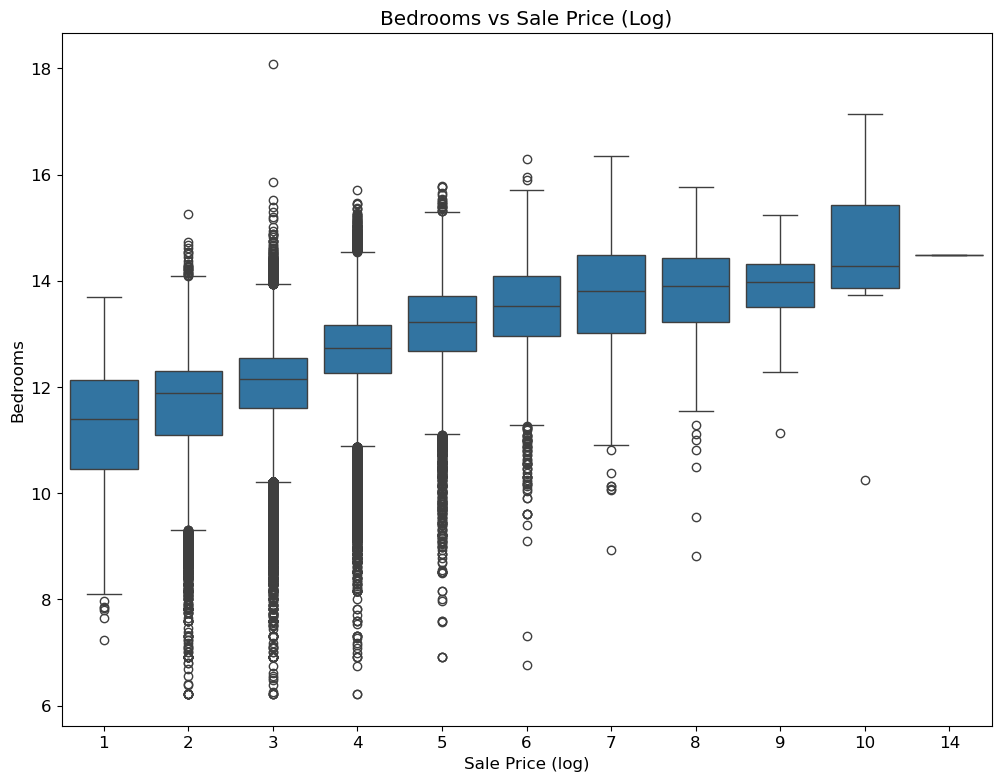

In [16]:
sns.boxplot(data=training_data, y="Log Sale Price", x="Bedrooms")
plt.xlabel('Sale Price (log)')
plt.ylabel('Bedrooms')
plt.title('Bedrooms vs Sale Price (Log)')

Let's also take a look at the relationship between neighborhood and sale prices of the houses in our dataset. Currently we don't have the actual names for the neighborhoods. But we will use a similar column Neighborhood Code (which is a numerical encoding of the actual neighborhoods by the Assessment office).

And before creating any visualization, I want to define a plot_categorical function to for better viewability.

In [17]:
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

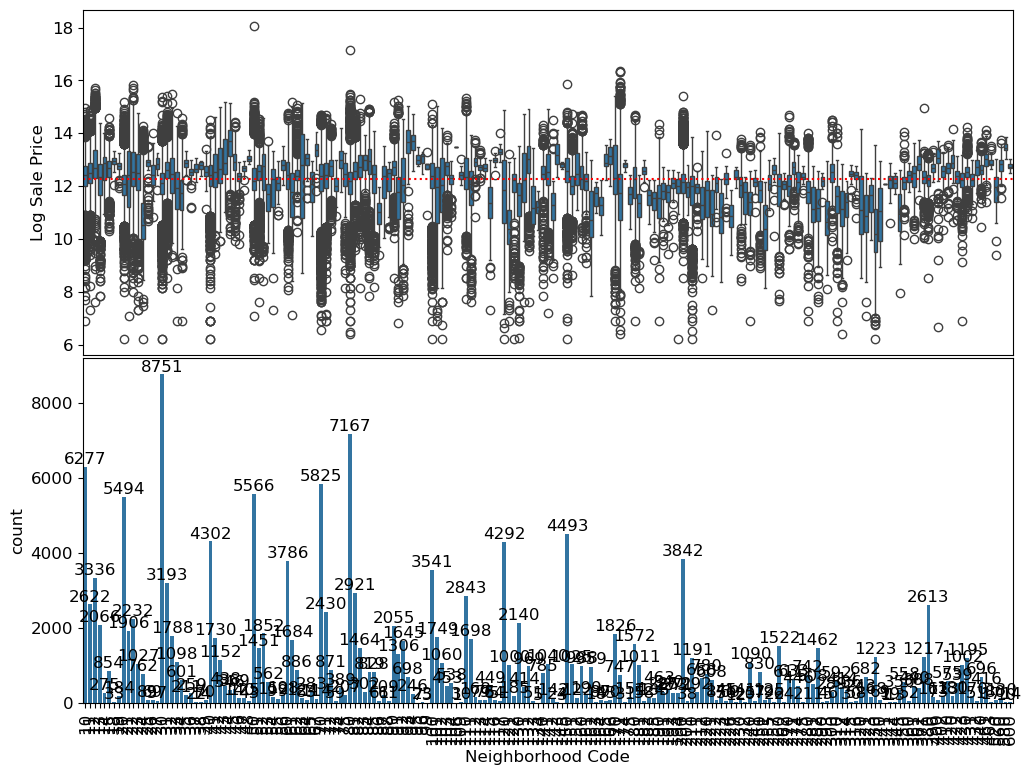

In [18]:
plot_categorical(training_data)

It looks like we have run into the problem of overplotting. This is because there are actually quite a few neighborhoods in our dataset! 

For the clarity of our visualization, we should zoom in again on a few of them so that our graph will become quite cluttered with a super dense x-axis.
And we can do this by creating a in_top_20_neighborhoods variable which is a copy of our raining_data that contains only top 20 neighborhoods with the most number of houses.

In [19]:
top_20_neighborhoods = training_data.groupby('Neighborhood Code').size().sort_values(ascending=False)[:20].index
in_top_20_neighborhoods = training_data[training_data['Neighborhood Code'].isin(top_20_neighborhoods)]

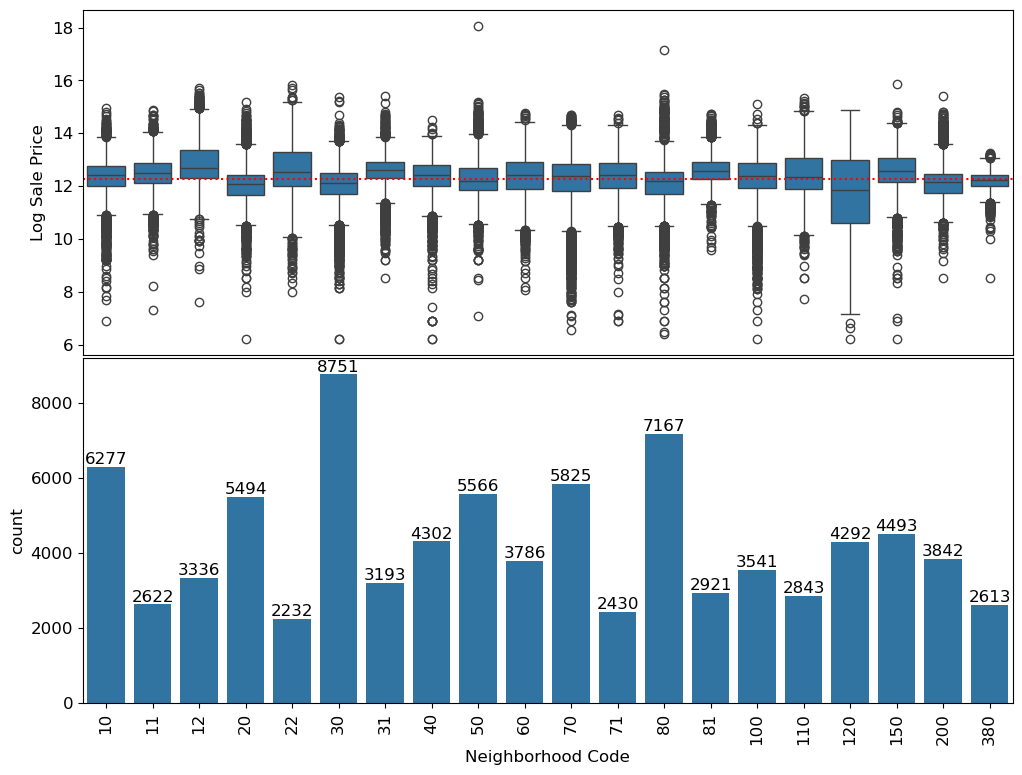

In [20]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

The plot above shows that there is a relationship between the houses' Log sale price and their nieghborhood. The relationship is determined by the how close the price range of these houses compared to each other. The average log sale price of houses with respect to their neighborhood is relatively close to 12. Therefore, you can say that a lot of properties in those neighborhood will have a log price sale around 12. Though the log sale price distributions slightly change depending on the neighborhood they are in.

To address the issue of insufficient data from certain neighborhoods, we can also create a new feature that categorizes neighborhoods based on their typical sale prices. Specifically, we can group neighborhoods to reflect a measure of property value. A practical approach is to identify the top neighborhoods based on median "Log Sale Price" and categorize them as "expensive neighborhoods." This helps simplify the analysis by focusing on clusters of high-value areas rather than treating each neighborhood individually.

In this case, we can define "expensive neighborhoods" as the top 3 neighborhoods with the highest median "Log Sale Price." By binning neighborhoods in this manner, we can reduce data sparsity issues, especially when some neighborhoods have limited transactions. This grouping helps in improving model robustness when including neighborhood features.

Below is a function that identifies and returns the top n most expensive neighborhoods based on a chosen metric (e.g., median sale price):

In [22]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (DataFrame): should contain at least a string-valued 'Neighborhood Code'
        and a numeric 'Log Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods 
      as measured by the metric function
    """
    neighborhoods = data[['Neighborhood Code', 'Log Sale Price']].groupby('Neighborhood Code').agg(metric).sort_values(by='Log Sale Price', ascending=False).index[:n]
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

After identifying a list of neighborhoods with higher property values, we can enhance our dataset by creating a new feature that explicitly indicates whether a property belongs to one of these "expensive neighborhoods." This type of feature is known as a binary indicator variable, which takes the value of 1 if a house is located in an expensive neighborhood and 0 otherwise.

This indicator essentially allows us to better understand and leverage location-based pricing trends later on.

In [25]:
def add_in_expensive_neighborhood(data, neighborhoods):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Neighborhood Code' column with values
        found in the codebook
      neighborhoods (list of strings): strings should be the names of neighborhoods
        pre-identified as expensive
    Output:
      DataFrame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(neighborhoods).astype(int)
    return data

training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

The "Roof Material" column in our dataset contains numerical codes representing different types of roofing materials as described in "codebook.txt".
To make this feature easier to understand and suitable for analysis, we will replace these codes with their corresponding descriptive labels.

Below is a function that substitutes these numerical values with the actual material names:

In [26]:
def substitute_roof_material(data):
    """
    Input:
      data (DataFrame): a DataFrame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      DataFrame identical to the input except with a refactored 'Roof Material' column
    """
    data = data.copy()
    roof_dict = {1:'Shingle/Asphalt', 2:'Tar&Gravel', 3:'Slate', 4:'Shake', 5:'Tile', 6:'Other'}
    data['Roof Material'] = data['Roof Material'].replace(roof_dict)
    return data
    
training_data = substitute_roof_material(training_data)
training_data.head(3)

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,2.0,Shingle/Asphalt,1.0,1.0,...,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3,0
2,25221150230000,202,210,4375.0,70,0.0,2.0,Shingle/Asphalt,2.0,3.0,...,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,3,0
3,10251130030000,203,220,4375.0,17,0.0,3.0,Shingle/Asphalt,1.0,3.0,...,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,3,0


After replacing the numerical codes with descriptive labels for the "Roof Material" column, the next step is to prepare this categorical variable for use in the model. Since "Roof Material" is a categorical feature, we need to one-hot encode it, creating binary columns for each unique category.

Below is the function that one-hot encodes the "Roof Material" column, using Scikit-learn's OneHotEncoder:

In [28]:
def ohe_roof_material(data):
    """
    One-hot-encodes roof material. New columns are of the form "Roof Material_MATERIAL".
    """
    
    oh_enc = OneHotEncoder()
    cols = [['Other'], ['Shake'], ['Shingle/Asphalt'], ['Slate'], ['Tar&Gravel'], ['Tile']]
    oh_enc.fit(cols)
    oh = oh_enc.transform(data[['Roof Material']]).toarray()
    en_data = pd.DataFrame(oh, index=data.index, columns=["Roof Material_" + i[0] for i in cols])

    return pd.concat([data, en_data], axis=1)

training_data_ohe = ohe_roof_material(training_data)
# Return columns with name that starts with "Roof Material_" 
training_data_ohe.filter(regex='^Roof Material_').head(5)

,Roof Material_Other,Roof Material_Shake,Roof Material_Shingle/Asphalt,Roof Material_Slate,Roof Material_Tar&Gravel,Roof Material_Tile
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0


### Conclusion and Next Steps

This project served as an in-depth exploration of Cook County's housing data, using various data wrangling and feature engineering techniques to prepare the dataset for modeling. The key takeaways include understanding the importance of feature transformations (e.g., log transformations) and identifying relationships between features that could significantly impact housing prices.

In the next phase of this project (Part A.2), we will utilize linear regression to create a predictive model for housing prices, taking into consideration the engineered features and insights from the EDA. This will involve fitting the model, evaluating its performance, and considering strategies for improvement.

### Skills and Tools Used
- **Data Wrangling:** Python (pandas), handling missing values, data cleaning.
- **Exploratory Data Analysis (EDA):** Matplotlib, Seaborn for visualization.
- **Feature Engineering:** Creating new features from existing data, handling categorical variables, one-hot encoding.
- **Statistical Analysis:** Correlation analysis, outlier removal, data transformation for normality.